<img style = "float: left; margin: 30px 15px 15px 15px;" src = "https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color = "navy"> Simulación de procesos financieros. 

**Nombres:** Moisés Flores Ortiz y Miriam Eunice Rosas Medellín.

**Fecha:** 17 de marzo del 2021.

**Expediente** : 722183 y 721278.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MoyMFO/proyecto_modulo1
# Proyecto TEMA-2

___
### 1.1 Título del trabajo.
Pronóstico del comportamiento de Covid-19 en México.

### 1.2 Objetivos.
#### 1.1 Objetivo general.
- Crear una simulación que permita pronosticar el comportamiento del Covid-19 en México y que haga posible determinar un tipo de cuarentena que minimice sus efectos económicos pero también minimice el riesgo epidémico.

#### 1.2 Objetivos específicos
- Encontrar una distribución de probabilidad adecuada que se ajuste a los datos.
- Realizar una simulación de cuatro diferentes variables que conforman el comportamiento del Covid-19.
- Pronósticar el comportamiento de Covid-19 en México en las próximas 4 semanas según qué tan estricta es la cuarentena.
- Generar rangos y cardinalidad para la estimación de riesgo epidémico poblacional.
- Determinar qué tipo de cuarentena dependiendo el porcentaje de movilidad garantiza un riesgo bajo.

### 1.3 Definición del problema.
El virus SARS-CoV-2, a través de la enfermedad Covid-19, ha desencadenado a nivel mundial múltiples fallecimientos en el contexto de la presente pandemia, la cual hasta ahora ha durado casi un año entero. Sin embargo, diferentes factores han hecho que en algunos países haya más casos confirmados y decesos que en otros. Algunos de estos factores están enteramente en manos del gobierno, otros son más culturales y son responsabilidad de los ciudadanos, y otros tantos no pueden ser controlados por nadie. Sean cuales sean estos factores en concreto, lo cierto es que México actualmente es el quinceavo país en el mundo con más muertes por millón de habitantes (OMS, 2020). A su vez, nuestro país es el que cuenta con la segunda tasa de letalidad más alta entre todos los países de América Latina y el Caribe.

En este contexto, se desarrollará un modelo de simulación que permita pronosticar la evolución de cuatro diferentes variables que describen el comportamiendo del Covid-19: casos confirmados, casos sospechosos, hospitalizados y defunciones; para así poder tomar decisiones acertadas acerca de los lineamientos de la cuarentena, que permitan mitigar los efectos tanto económicos como de salud pública que puedan ser provocados por la dinámica de la epidemia. Se considerará viable establecer niveles de riesgo epidémico conforme a rangos distribuidos en cuartiles para cada una de las variables utilizadas en la simulación. Además, se elegirá como estrategia, la cuarentena menos restrictiva de todas las que hagan posible llegar a un riesgo bajo antes de los próximas 4 semanas.

**Los supuestos son**:
- Los datos recopilados de las variables son reales.
- Se toman los datos a partir del 31 de diciembre del 2019, fecha en la cual se empezaron a recolectar los datos.
- La tasa de movilidad de los escenarios se toma sobre la movilidad real.
- La población que no se moviliza no se contagia ni se hace pruebas.
- La relación de todas las variables con riesgo epidémico es positiva.
- Todas las variables tienen el mismo peso en la estimación del riesgo epidémico.
- La cuarentena menos restrictiva minimiza sus estragos económicos.

### 1.4 Nodos y variables que se decidieron simular y porqué
**Escenarios de simulación**:
- Escenario 1 (cuarentena estricta): 10% de la población total se moviliza durante 4 semanas.
- Escenario 2 (cuarentena moderada): 25% de la población total se moviliza durante 4 semanas.
- Escenario 3 (cuarentena flexible): 50% de la población total se moviliza durante 4 semanas.
- Escenario 4 (cuarentena nula):     100% de la población total se moviliza durante 4 semanas.

**Variables de simulación**:
- Casos confirmados: Personas que cumplan con la definición operacional de caso sospechoso y que cuenten con diagnóstico confirmado por la Red Nacional de Laboratorios de Salud Pública reconocidos por el Instituto de Diagnóstico y Referencia Epidemiológicos (InDRE).
- Casos sospechosos: Personas de cualquier edad que en los últimos 7 días hayan presentado al menos dos de los siguientes signos y síntomas:
  - Tos, fiebre o dolor de cabeza. <br>
    Acompañados de al menos uno de los siguientes signos o síntomas:
  - Dificultad para respirar (dato de alarma)
  - Dolor en las articulaciones
  - Dolor muscular
  - Dolor de garganta 
  - Escurrimiento nasal
  - Conjuntivitis (enrojecimiento, picazón y ojos llorosos)
  - Dolor en el pecho (IMSS, s. f.)
- Hospitalizados: Personas que cuentan con un diagnóstico confirmado por la Red Nacional de Laboratorios de Salud Pública reconocidos por el InDRE y que han sido ingresados a una unidad hospitalaria.
- Defunciones: Personas que después de obtener un diagnóstico confirmado, fallecen a causa de la enfermedad.

Cada variable se va a simular en cada uno de los escenarios de simulación planteados previamente, con el objetivo de ubicar cada una en un cuartil que defina su cardinalidad en el riesgo epidémico poblacional. Posteriormente, crear un indicador con la sumatoria de las cardinalidades de cada una de las variables, y determinar con él el riesgo epidémico asociado a cada nodo. Las clasificaciones de riesgo son las siguientes:
- Bajo: se puede salir pero con precaución y prevención.
- Moderado: hay más actividades, pero con precaución.
- Alto: preferentemente, no salir si no es estrictamente necesario.
- Máximo: salir solamente si se trata de necesidades básicas.

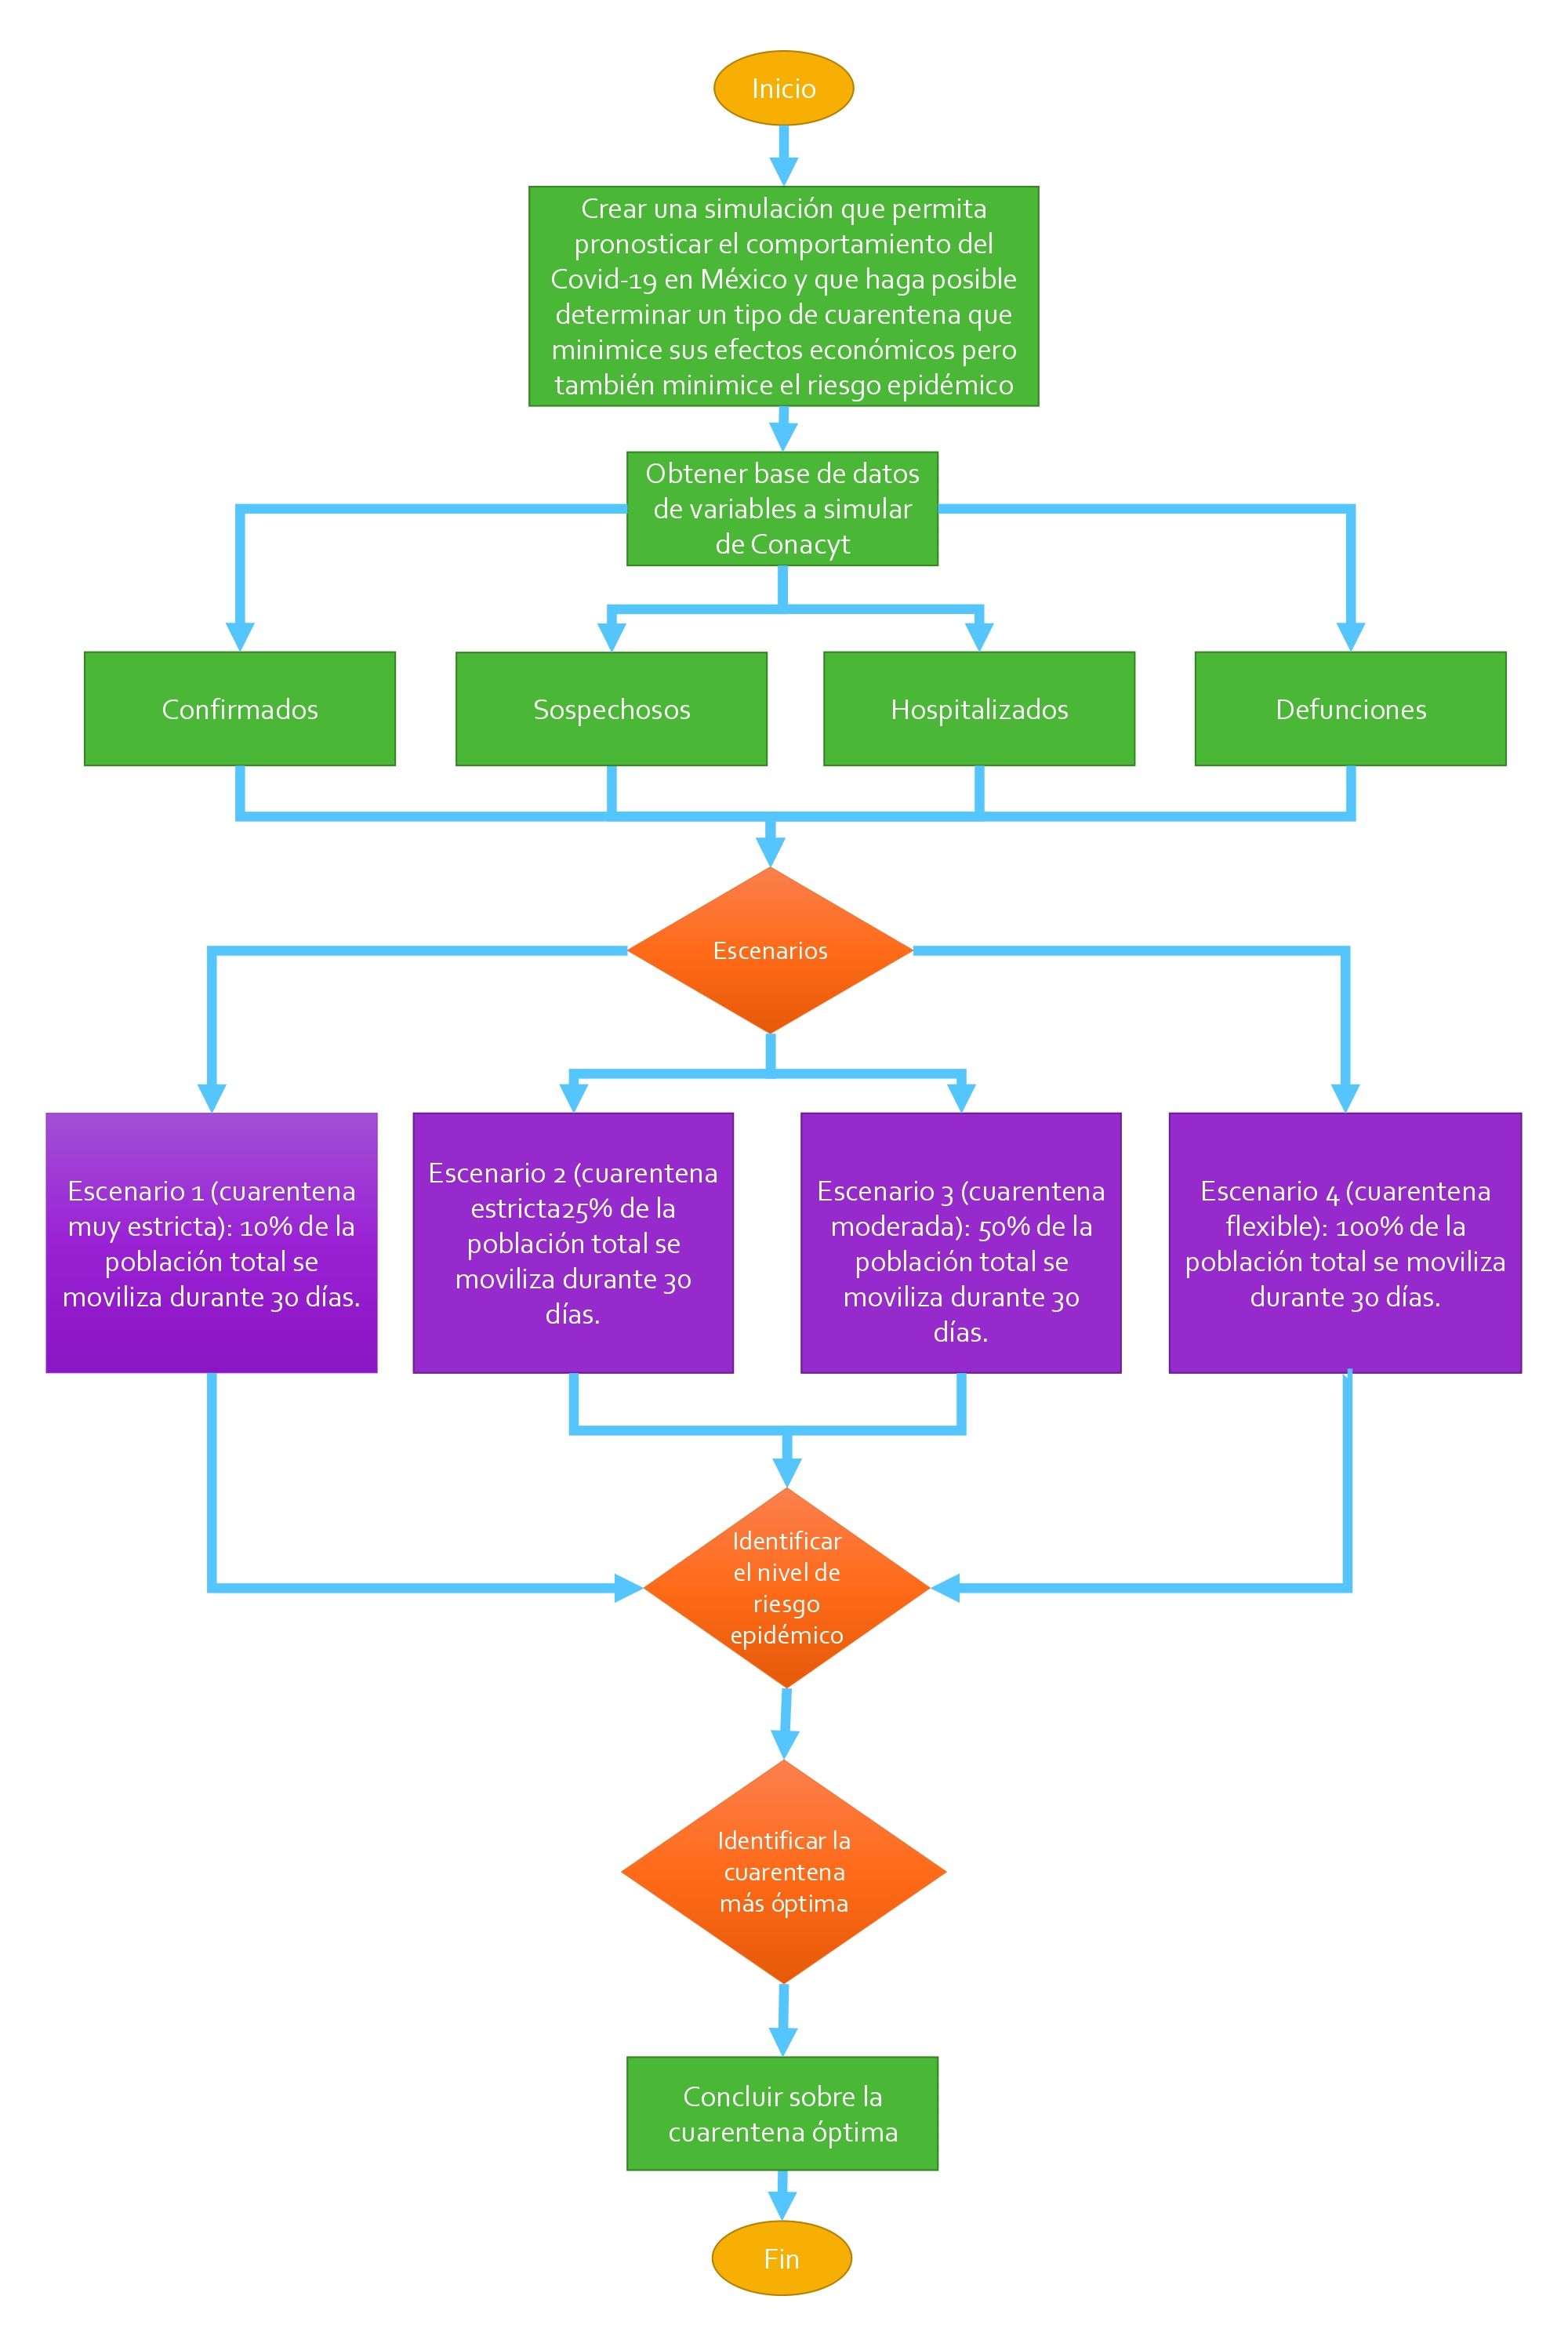

### 1.6 Obtención de bases de datos
La base de datos que utilizaremos se encuentra en la página del Conacyt (referencia número 1). El archivo de excel con los datos cargados también se encuentra en el repositorio de GitHub del proyecto. La base de datos esta preparada para ser usada.

In [1]:
# Importación de paquetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import scipy.stats as st
import statsmodels.api as sm 
import datetime
from collections import Counter
import warnings; warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from scipy import optimize
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from fitter import Fitter
%matplotlib inline

In [2]:
data = pd.read_excel("DATOS_COVID-19.xlsx", sheet_name = "Hoja1")
data.set_index("Fecha", inplace = True)
data.head(10)

,Hospitalizados,Confirmados,Defunciones,Sospechosos
Fecha,,,,
2020-01-06,921,0,0,442
2020-01-13,2229,0,0,1137
2020-01-20,3117,0,0,1712
2020-01-27,3283,0,0,1704
2020-02-03,2577,0,0,1430
2020-02-10,3212,0,0,1795
2020-02-17,2841,0,0,1548
2020-02-24,2805,4,1,1687
2020-03-02,3078,14,0,1690


### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.


#### <font color = "blue"> Nodo 4: 100% de la población se moviliza durante 4 semanas (cuarentena nula) <font color>

##### Variable: Confirmados

In [6]:
# Se obtienen de la base de datos los casos confirmados (DataFrame)
data_confirmados = pd.DataFrame(data["Confirmados"][7:])
data_confirmados.head(10)

,Confirmados
Fecha,
2020-02-24,4
2020-03-02,14
2020-03-09,24
2020-03-16,302
2020-03-23,786
2020-03-30,1521
2020-04-06,2438
2020-04-13,3816
2020-04-20,6778


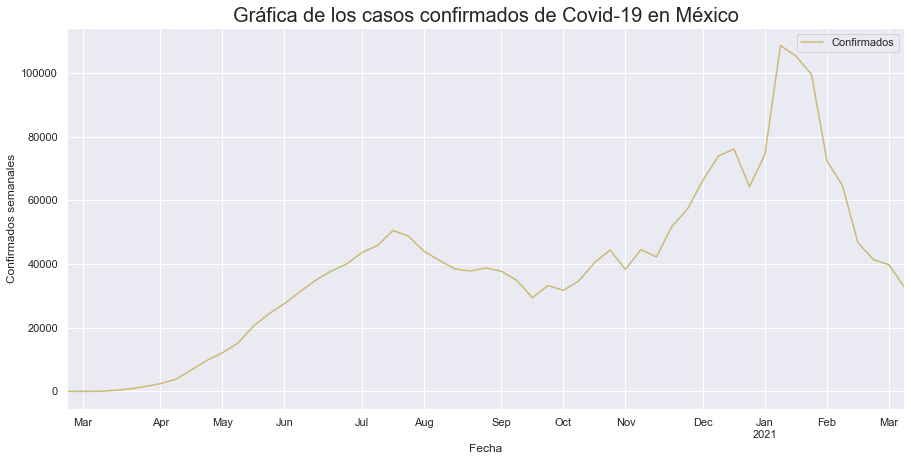

In [7]:
# Gráfica de los datos
def graficar_datos(datos: "recibe un dataframe", titulo: "título de la gráfica", labely = "nombre del eje y"):
    """Esta función regresa una gráfica de los datos ingresados."""
    datos.plot(figsize = [15, 7], color = "y")
    plt.title(titulo, fontsize = 20)
    plt.xlabel("Fecha", fontsize = 12)
    plt.ylabel(labely, fontsize = 12)
    plt.show()
graficar_datos(data_confirmados, "Gráfica de los casos confirmados de Covid-19 en México", "Confirmados semanales")

,sumsquare_error,aic,bic,kl_div
foldcauchy,6.606737e-11,151.707773,-1497.600360,0.071631
laplace,6.961787e-11,149.243305,-1498.728648,0.077760
gennorm,6.979555e-11,151.814357,-1494.581121,0.077491
dgamma,7.037412e-11,151.933614,-1494.127080,0.075639
dweibull,7.522067e-11,151.534522,-1490.464055,0.072278


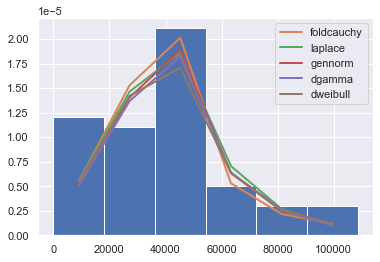

In [10]:
# Encontrar si es que hay, las primeras 3 distribuciones que mejor se ajusten a los datos
def fitter(data: "debe ser una array"):
    """Esta función utiliza la librería Fitter para obtener las distribuciones que mejor se ajustan a los datos"""
    fitter1 = Fitter(data, bins = (1 + int(np.log2(len(data)))), timeout = 10) # regla de Sturges para los bins
    fitter1.fit()
    return fitter1.summary()
x1 = np.array(data_confirmados).flatten()
fitter(x1)

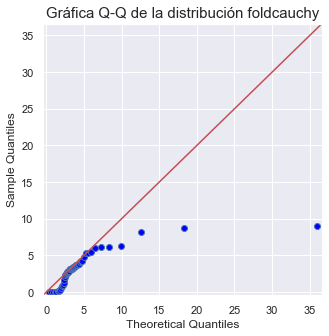

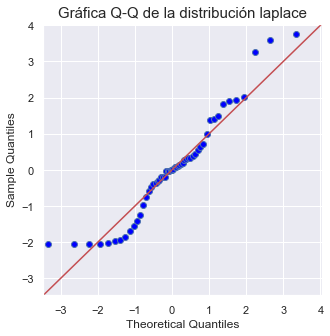

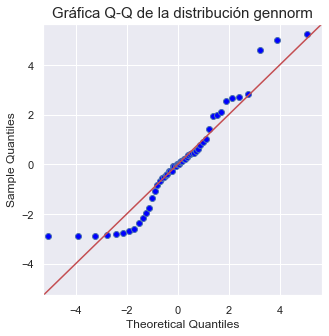

In [13]:
# Hacer las gráficas de cuartil cuartil
def graficas_qq(best: "las distribuciones que mejor se ajustaron", data: "debe ser un array"):
    """Esta función regresa las gráficas cuartil cuartil de las distribuciones dadas y los datos reales"""
    for dist in best:
        fig, ax = plt.subplots(1, 1, figsize = [5, 5])
        sm.qqplot(data, dist = getattr(st, dist), line = "45", fit = True, ax = ax)
        plt.title(f"Gráfica Q-Q de la distribución {dist}", fontsize = 15)
best1 = ["foldcauchy", "laplace", "gennorm"]
graficas_qq(best1, x1)

In [7]:
# Obtener bandwidth adecuado con KernelDensity()
def bandwidth_KernelD(datos: "recibe un DataFrame de los datos", limite_sup: "límite superior del linspace"):
    """Esta función regresa el bandwidth estimado con las librerías KernelDensity y GridSearchCV."""
    x = np.array(datos) # Se convierten a un arreglo los datos confirmados
    x = x.flatten() # Cambiamos el array a dimensión 1 x n
    grid = GridSearchCV(KernelDensity(), {"bandwidth": np.linspace(0.1, limite_sup, 30)}, cv = 20) # validación
    grid.fit(x[:, None])
    return grid.best_params_
bandwidth_KernelD(data_confirmados, 100000)

{'bandwidth': 6896.644827586207}

In [15]:
# Obtener la bandwidth con la función en lugar de un array con KDEMultivariate
def bandwidth_KDEM(datos: "debe ser un array"):
    """Esta función regresa el bandwidth estimado con la librería de KDEMultivariate."""
    kde_multivariate = KDEMultivariate(data = datos, var_type = "c", bw = "cv_ml")
    return kde_multivariate.bw
bandwidth_opt1 = bandwidth_KDEM(x1)
bandwidth_opt1

array([4690.34418488])

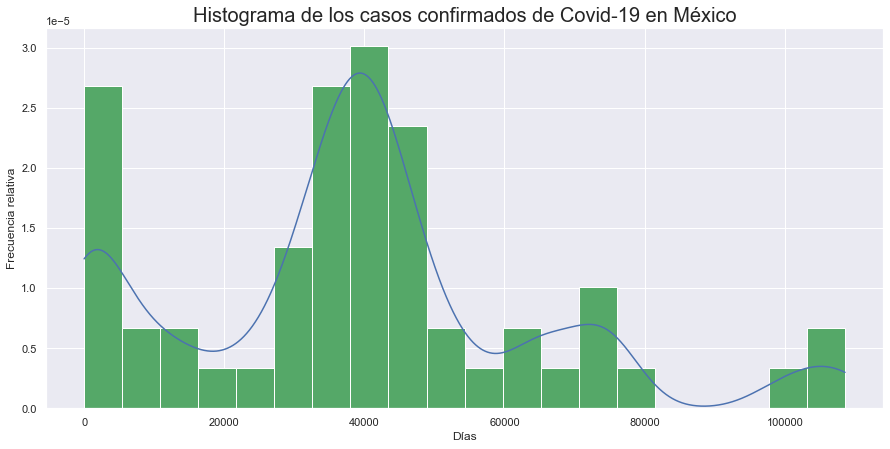

(<function __main__.hist_vs_sklearn.<locals>.<lambda>(datos)>,
 array([     4,      5,      6, ..., 108602, 108603, 108604], dtype=int64))

In [19]:
# Se grafica el histograma de los datos junto con la función de densidad obtenida
def hist_vs_sklearn(bandwidth: "bandwith obtenido con KDEMUltivariate", datos: "debe ser un array", bins: "bins"):
    """Esta función regresa una gráfica del histograma de los datos usando el KDEMultivariate junto con una función de densidad
    generada."""
    kde_sklearn = KernelDensity(bandwidth = bandwidth, kernel = "gaussian").fit(datos[:, np.newaxis])
    f_skle = lambda datos: np.exp(kde_sklearn.score_samples(datos[:, None])) # Función de densidad g(x)
    x_grid = np.arange(datos.min(), datos.max())
    plt.figure(figsize = [15, 7])
    plt.plot(x_grid, f_skle(x_grid))
    plt.hist(datos, bins = bins, density = True, color = "g")
    plt.title("Histograma de los casos confirmados de Covid-19 en México", fontsize = 20)
    plt.xlabel("Días", fontsize = 12)
    plt.ylabel("Frecuencia relativa", fontsize = 12)
    plt.show()
    return f_skle, x_grid
hist1 = hist_vs_sklearn(bandwidth_opt1[0], x1, 20)
hist1

In [25]:
def Acep_rechazo(R2: "Variables distruidas U ~ U(0, 1)", R1: "Variables distribuidas como g(x)",
                 f: "Función objetivo a generar", t: "Función que mayor a f"):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2 * t_x <= f_x
    [plt.plot(R1[i], R2[i] * t_x[i], "om") if condition[i] else plt.plot(R1[i], R2[i] * t_x[i], 'oc') for i in range(len(R1))]
    plt.show()
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

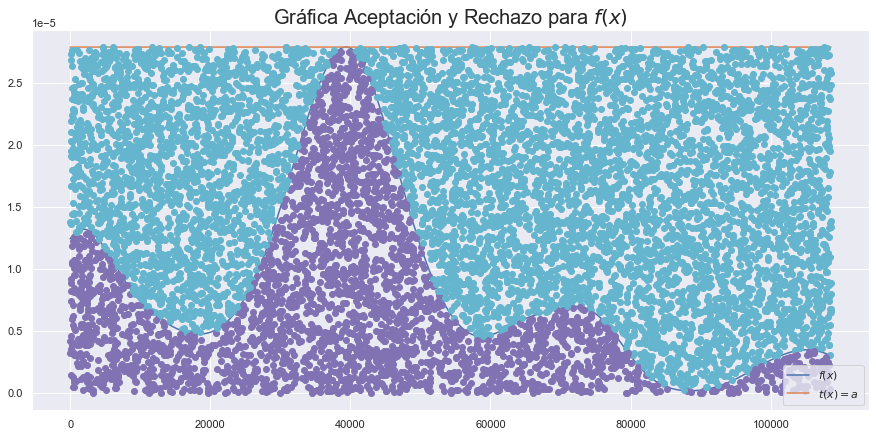

In [26]:
np.random.seed(4567)
def grafica_acep_rechazo(x_grid: "x_grid", f_skle: "función de densidad generada", objetivo: "número cercano al máximo"):
    """Esta función regresa una gráfica de los puntos aceptados y rechazados."""
    plt.figure(figsize = [15, 7])
    plt.title("Gráfica Aceptación y Rechazo para $f(x)$", fontsize = 20)
    xa = x_grid
    f = f_skle
    a = f(optimize.fmin(lambda xa: -f(xa), objetivo, disp = False))
    t = lambda xa: a * np.ones([len(xa)])
    plt.plot(xa, f(xa), label = "$f(x)$")
    plt.plot(xa, t(xa), label = "$t(x) = a$")
    plt.legend(loc = "best");
    return f, t
graf1 = grafica_acep_rechazo(hist1[1] , hist1[0], 40000)
graf1

# Validación del método con reducción de varianza por numeros complementarios
N = 10000 # número de puntos a simular
r2_i = np.random.rand(int(N / 2)) # como estoy tomando t(x) constante solo es necesario generar valores aleatorios U ~ (0, 1)
r2_c = 1 - r2_i
R2 = np.concatenate([r2_i, r2_c])
R1 = np.random.uniform(x1.min(), x1.max(), size = N)
V_A1 = Acep_rechazo(R2, R1, graf1[0] , graf1[1])

In [12]:
# Prueba chi-cuadrada
def prueba_chi2(data: "debe ser un array", best: "lista de las distribuciones que mejor se ajustan", 
                va: "variable aleatoria generada en el método de aceptación y rechazo"):
    """Esta función retorna los resultados de la prueba de Chi cuadrada."""
    observada_kernel = np.histogram(data, bins = (1 + int(np.log2(len(data)))), density = True)[0] # regla de Sturges
    esperada_kernel =  np.histogram(va[0:len(data)], bins = (1 + int(np.log2(len(va[0:len(data)])))), density = True)[0]
    print(f" Resultado de Chi2 con KDEMultivariate: {st.chisquare(f_obs = observada_kernel, f_exp = esperada_kernel, axis = 0)}"
         )
    for dist in best:
        observada = np.histogram(data, bins = (1 + int(np.log2(len(data)))), density = True)[0]
        params = getattr(st, dist).fit(data)
        rvs = getattr(st, dist)(*params).rvs(len(data))
        esperada =  np.histogram(rvs, bins = (1 + int(np.log2(len(rvs)))), density = True)[0]
        Chi_est = st.chisquare(f_obs = observada, f_exp = esperada, axis = 0)
        print(f"\n Resultado de Chi2 para la distribución {dist}: {Chi_est}")
chi2_1 = prueba_chi2(x1, best1[1:], V_A1)
chi2_1

 Resultado de Chi2 con KDEMultivariate: Power_divergenceResult(statistic=4.512229783193485e-06, pvalue=0.9999999999999977)

 Resultado de Chi2 para la distribución laplace: Power_divergenceResult(statistic=0.0001875184816222215, pvalue=0.9999999999743888)

 Resultado de Chi2 para la distribución gennorm: Power_divergenceResult(statistic=0.00045537818113082897, pvalue=0.9999999997646529)


In [35]:
# Prueba de Kolmogorov
def prueba_kolmogorov(data: "debe ser un array", best: "lista de las distribuciones que mejor se ajustan",
                     va: "variable aleatoria generada en el método de aceptación y rechazo"):
    """Esta función retorna los resultados de la prueba de Kolmogorov-Smirnov."""
    print(f" Resultado de Kolmogorv-Smirnov con KDEMultivariate: {st.kstest(data, va[0:len(data)])}")
    for dist in best:
        params = getattr(st, dist).fit(data)
        kolmogorov = st.kstest(data, dist, args = params)
        print(f"\n Resultado de Kolmogorov-Smirnov para la distribución {dist}: {kolmogorov}")
prueba_kolmogorov(x1, best1[1:], V_A1)

 Resultado de Kolmogorv-Smirnov con KDEMultivariate: KstestResult(statistic=0.10909090909090909, pvalue=0.9030745921833321)

 Resultado de Kolmogorov-Smirnov para la distribución laplace: KstestResult(statistic=0.07788555484421462, pvalue=0.8666441453321636)

 Resultado de Kolmogorov-Smirnov para la distribución gennorm: KstestResult(statistic=0.08098307677795356, pvalue=0.8349231878064112)


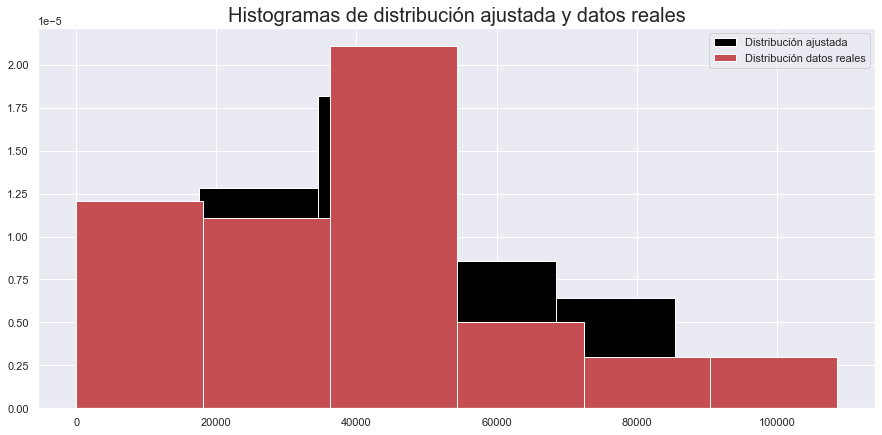

In [14]:
# Comparación de histogramas
def histreal_vs_histva(data: "debe ser un array", va: "variable aleatoria generada en el método de aceptación y rechazo" = None, 
                      dist: "distribución elegida" = None):
    """Esta función retorna en una sóla gráfica el histograma con la distribución ajustada y con los datos reales con propósitos
    de comparación. Hay que tener en cuenta que si se le pasa una 'va' a la función, esto quiere decir que se elegió la función
    de distribución de KDEMultivariate, entonces no se le pasa un 'dist'. Si se le pasa un 'dist', quiere decir que se escogió
    una distribución convencional de la paquetería de SciPy Stats."""
    if dist == None:
        plt.figure(figsize = [15, 7])
        plt.title("Histogramas de distribución ajustada y datos reales", fontsize = 20)
        plt.hist(va[0:len(data)], bins = (1 + int(np.log2(len(va[0:len(data)])))), density = True, 
                 label = "Distribución ajustada", color = "black");
        plt.hist(data, bins = (1 + int(np.log2(len(data)))), density = True, label = "Distribución datos reales", color = "r");
        plt.legend(loc = "best")
    if dist != None:
        params = getattr(st, dist).fit(data)
        rvs = getattr(st, dist)(*params).rvs(len(data))
        plt.figure(figsize = [15, 7])
        plt.title("Histogramas de distribución ajustada y datos reales", fontsize = 20)
        plt.hist(rvs, bins = (1 + int(np.log2(len(rvs)))), density = True, 
                 label = "Distribución ajustada", color = "black");
        plt.hist(data, bins = (1 + int(np.log2(len(data)))), density = True, label = "Distribución datos reales", color = "r");
        plt.legend(loc = "best")
        return rvs
histreal_vs_histva(x1, V_A1)

In [15]:
# Se establece un limite para tomar los datos consecutivos de la simulación
def lim_KDE(data: "debe ser un array"):
    c = data
    c = pd.DataFrame(c)
    dif = abs((c.shift() - c).dropna())
    limite = dif.mean()[0].astype("int")
    return limite
limite1 = lim_KDE(x1)
limite1

5033

In [16]:
# Se hace una función que simula 4 semanas tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
V_A1 = np.array(V_A1)
choice = np.random.choice
def mes(sem: "semanas del forecast", r: "tasa de movilidad", limite: "límite estimado", data: "debe ser un array",
        va: "variable aleatoria genera en el método de aceptación y rechazo"):
    l = []
    k = data[-1]
    l.append(k)
    for i in range(sem):
        z = k + limite * r
        y = k - limite * r
        k = choice(va[(y < va) & (va < z)]) * r 
        l.append(k)
    return np.array(l)

In [17]:
# Hacer la simulación de los casos confirmados
np.random.seed(4567)
escenarios, sem, r1 = 10000, 4, 1
confirmados_esperados1 = np.array(list(map(lambda x: mes(sem, r1, limite1, x1, V_A1), range(escenarios)))).astype("int")

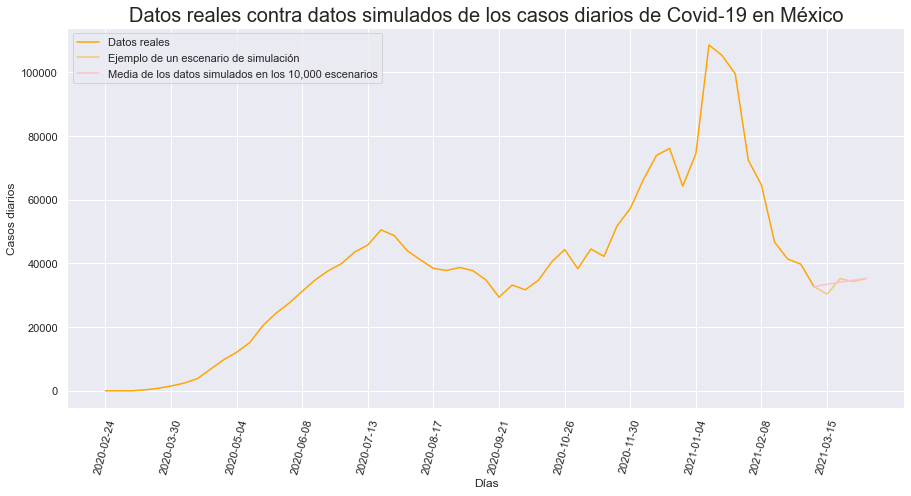

,0
2021-03-08,32742.0000
2021-03-15,33462.2549
2021-03-22,34127.9727
2021-03-29,34738.5846
2021-04-05,35295.1998


In [18]:
# Graficar el forecast
def grafica_forecast(forecast: "un escenario", data: "debe ser DataFrame", 
                     no_escenario: "número de escenario del total generado" = 0):
    simulacion = pd.DataFrame(forecast[no_escenario])
    simulacion.index = ["2021-03-08", "2021-03-15", "2021-03-22", "2021-03-29", "2021-04-05"]
    simulacion_media = pd.DataFrame(forecast.mean(axis = 0))
    simulacion_media.index = ["2021-03-08", "2021-03-15", "2021-03-22", "2021-03-29", "2021-04-05"]
    data.index = data.index.astype("str")
    plt.figure(figsize = [15, 7])
    plt.plot(data, color = "orange", label = "Datos reales")
    plt.plot(simulacion, color = "orange", label = "Ejemplo de un escenario de simulación", alpha = 0.5)
    plt.plot(simulacion_media, color = "pink", label = "Media de los datos simulados en los 10,000 escenarios")
    plt.xlabel("Días", fontsize = 12)
    plt.ylabel("Casos diarios", fontsize = 12)
    plt.title("Datos reales contra datos simulados de los casos diarios de Covid-19 en México", fontsize = 20)
    plt.xticks(rotation = 75, ticks = np.arange(0, len(data) + len(simulacion), 5))
    plt.legend()
    plt.show()
    return simulacion_media
sim1 = grafica_forecast(confirmados_esperados1, data_confirmados, 1234)
sim1

In [48]:
# Calcular cardinalidad de esta variable en este escenario
def classification(sim, hist):
    if sim < hist.quantile(0.25):
        cardinalidad = 1
    elif hist.quantile(0.25) <= sim < hist.median():
        cardinalidad = 2
    elif hist.median() <= sim < hist.quantile(0.75):
        cardinalidad = 3
    elif hist.quantile(0.75) <= sim:
        cardinalidad = 4
    return cardinalidad
classification(sim1.iloc[-1][0], data_confirmados["Confirmados"])

2

##### Variable: Hospitalizados

In [20]:
# Se obtienen de la base de datos los hospitalizados (DataFrame)
data_hospitalizados = pd.DataFrame(data["Hospitalizados"])
data_hospitalizados.head(10)

,Hospitalizados
Fecha,
2020-01-06,921
2020-01-13,2229
2020-01-20,3117
2020-01-27,3283
2020-02-03,2577
2020-02-10,3212
2020-02-17,2841
2020-02-24,2805
2020-03-02,3078


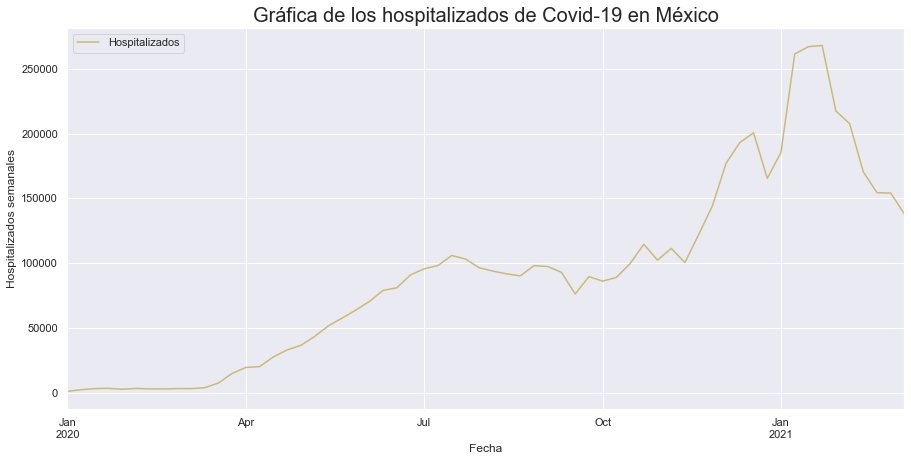

In [21]:
# Gráfica de los datos
graficar_datos(data_hospitalizados, "Gráfica de los hospitalizados de Covid-19 en México", "Hospitalizados semanales")

,sumsquare_error,aic,bic,kl_div
mielke,8.466020e-12,161.704895,-1820.061351,0.039615
triang,8.997673e-12,157.655491,-1820.412348,0.042408
kappa3,9.161378e-12,159.745661,-1819.294451,0.051188
foldnorm,9.285228e-12,159.026273,-1818.461906,0.046240
genpareto,9.350336e-12,158.536733,-1818.028676,0.043087


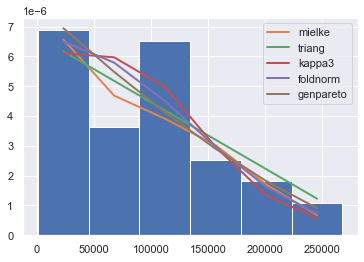

In [22]:
# Encontrar si es que hay, las primeras 3 distribuciones que mejor se ajusten a los datos
x2 = np.array(data_hospitalizados).flatten()
fitter(x2)

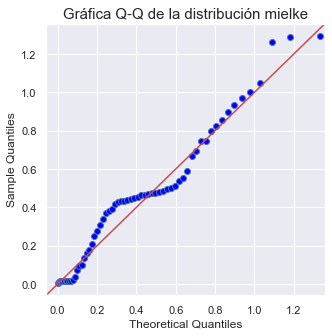

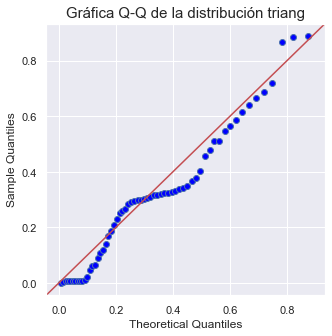

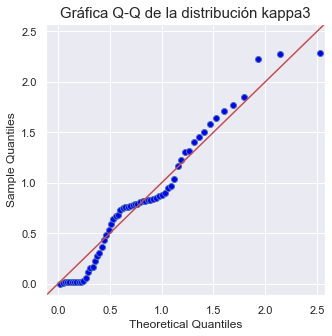

In [23]:
# Hacer las gráficas de cuartil cuartil
best2 = ["mielke", "triang", "kappa3"]
graficas_qq(best2, x2)

In [24]:
# Obtener la bandwidth con la función en lugar de un array con KDEMultivariate
bandwidth_opt2 = bandwidth_KDEM(x2)
bandwidth_opt2

array([8814.25607498])

In [20]:
# Se grafica el histograma de los datos junto con la función de densidad obtenida
hist2 = hist_vs_sklearn(bandwidth_opt2[0], x2, 20)
hist2

NameError: name 'bandwidth_opt2' is not defined

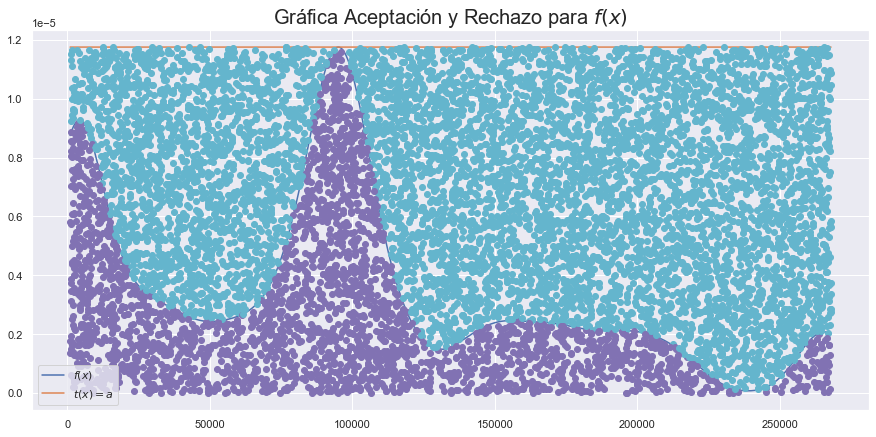

In [26]:
np.random.seed(4567)
graf2 = grafica_acep_rechazo(hist2[1] , hist2[0], 100000)
graf2

# Validación del método con reducción de varianza por números complementarios
N = 10000 # número de puntos a simular
r2_i = np.random.rand(int(N / 2)) # como estoy tomando t(x) constante solo es necesario generar valores aleatorios U ~ (0, 1)
r2_c = 1 - r2_i
R2 = np.concatenate([r2_i, r2_c])
R1 = np.random.uniform(x2.min(), x2.max(), size = N)
V_A2 = Acep_rechazo(R2, R1, graf2[0] , graf2[1])

In [27]:
# Prueba chi-cuadrada
chi2_2 = prueba_chi2(x2, best2, V_A2)
chi2_2

 Resultado de Chi2 con KDEMultivariate: Power_divergenceResult(statistic=1.1635772736891388e-06, pvalue=0.9999999999999999)

 Resultado de Chi2 para la distribución mielke: Power_divergenceResult(statistic=1.197772192497239e-05, pvalue=0.9999999999999736)

 Resultado de Chi2 para la distribución triang: Power_divergenceResult(statistic=9.898361865097131e-06, pvalue=0.9999999999999836)

 Resultado de Chi2 para la distribución kappa3: Power_divergenceResult(statistic=5.370336158653996e-06, pvalue=0.9999999999999964)


In [28]:
# Prueba de Kolmogorov
prueba_kolmogorov(x2, best2, V_A2)

 Resultado de Kolmogorv-Smirnov con KDEMultivariate: KstestResult(statistic=0.12903225806451613, pvalue=0.6846775783501532)

 Resultado de Kolmogorov-Smirnov para la distribución mielke: KstestResult(statistic=0.13432385373479683, pvalue=0.19478609724108187)

 Resultado de Kolmogorov-Smirnov para la distribución triang: KstestResult(statistic=0.15850790846327073, pvalue=0.07926249060366675)

 Resultado de Kolmogorov-Smirnov para la distribución kappa3: KstestResult(statistic=0.15999729813636632, pvalue=0.0746250300331055)


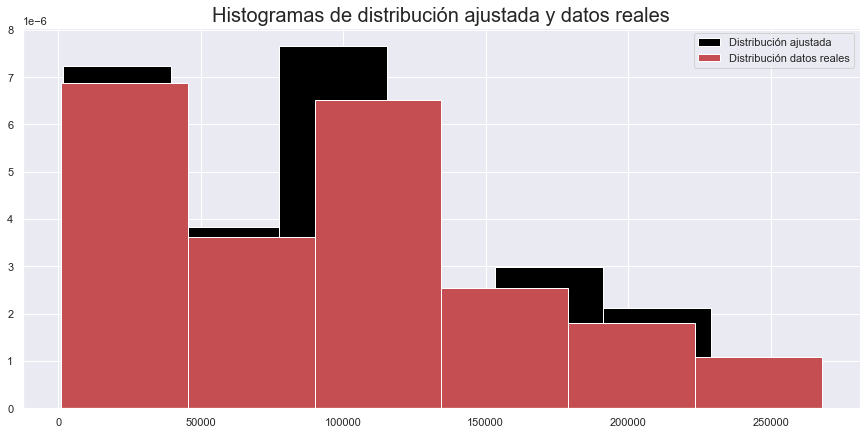

In [29]:
# Comparación de histogramas
histreal_vs_histva(x2, va = V_A2);

In [30]:
# Se establece un limite para tomar los datos consecutivos de la simulación
limite2 = lim_KDE(x2)
limite2

9812

In [31]:
# Se hace una función que simula 4 semanas tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
V_A2 = np.array(V_A2)
hospitalizados_esperados1 = np.array(list(map(lambda x: mes(sem, r1, limite2, x2, V_A2), range(escenarios)))).astype("int")

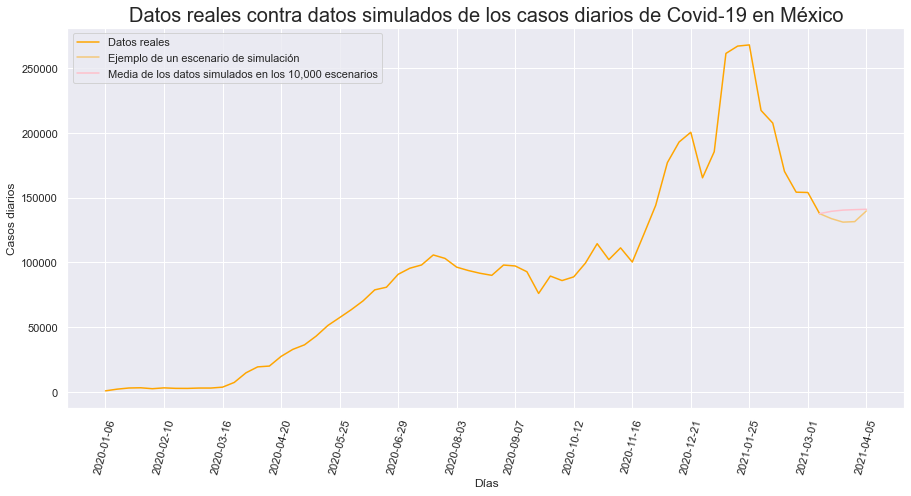

,0
2021-03-08,137726.0000
2021-03-15,139503.3768
2021-03-22,140446.1455
2021-03-29,140802.2711
2021-04-05,141083.2204


In [32]:
# Graficar el forecast
sim5 = grafica_forecast(hospitalizados_esperados1, data_hospitalizados, 1234)
sim5

In [33]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim5.iloc[-1][0], data_hospitalizados["Hospitalizados"])

4

##### Variable: Defunciones

In [3]:
# Se obtienen de la base de datos las defunciones (DataFrame)
data_defunciones = pd.DataFrame(data["Defunciones"][7:])
data_defunciones.head(10)

,Defunciones
Fecha,
2020-02-24,1
2020-03-02,0
2020-03-09,1
2020-03-16,1
2020-03-23,9
2020-03-30,56
2020-04-06,220
2020-04-13,463
2020-04-20,846


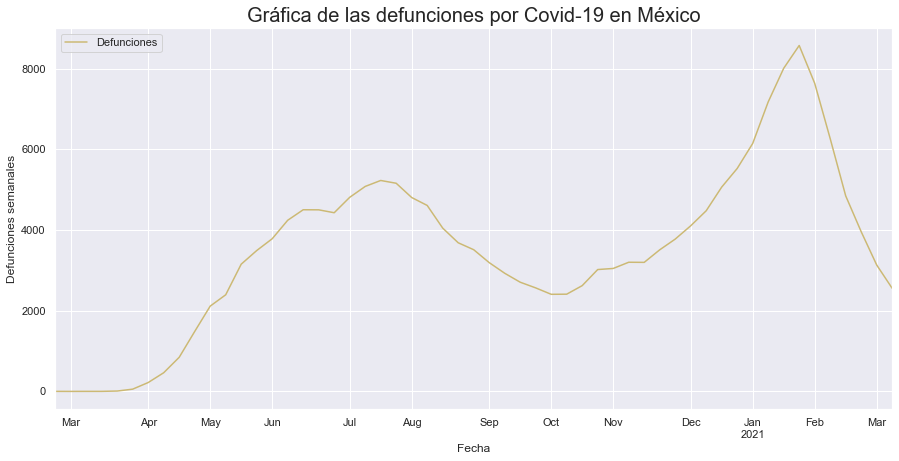

In [8]:
# Gráfica de los datos
graficar_datos(data_defunciones, "Gráfica de las defunciones por Covid-19 en México", "Defunciones semanales")

,sumsquare_error,aic,bic,kl_div
gennorm,6.386843e-09,118.411248,-1246.177745,0.071586
genlogistic,6.746994e-09,118.599963,-1243.160611,0.074025
logistic,6.806852e-09,116.574381,-1246.682144,0.074129
hypsecant,6.824329e-09,116.914012,-1246.541105,0.072803
dweibull,7.492929e-09,118.959164,-1237.393159,0.073205


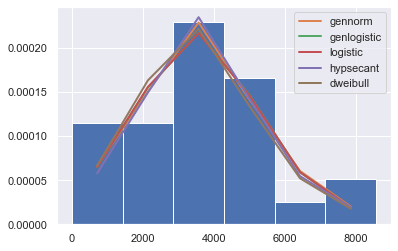

In [11]:
# Encontrar si es que hay, las primeras 3 distribuciones que mejor se ajusten a los datos
x3 = np.array(data_defunciones).flatten()
fitter(x3)

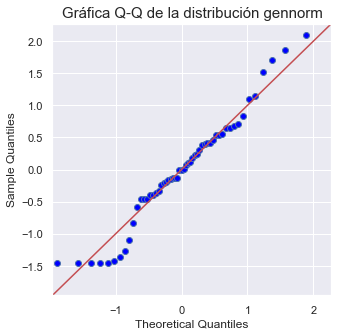

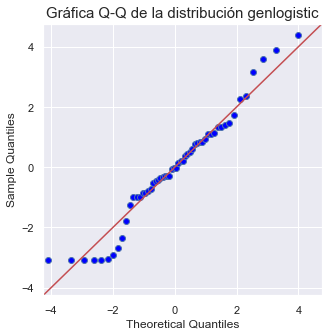

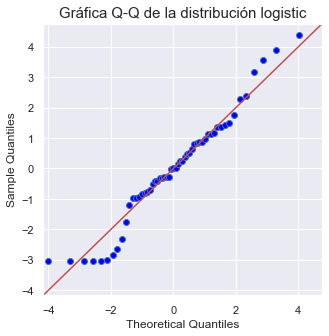

In [14]:
# Hacer las gráficas de cuartil cuartil
best3 = ["gennorm", "genlogistic", "logistic"]
graficas_qq(best3, x3)

In [16]:
# Obtener la bandwidth con la función en lugar de un array con KDEMultivariate
bandwidth_opt3 = bandwidth_KDEM(x3)
bandwidth_opt3

array([513.68687396])

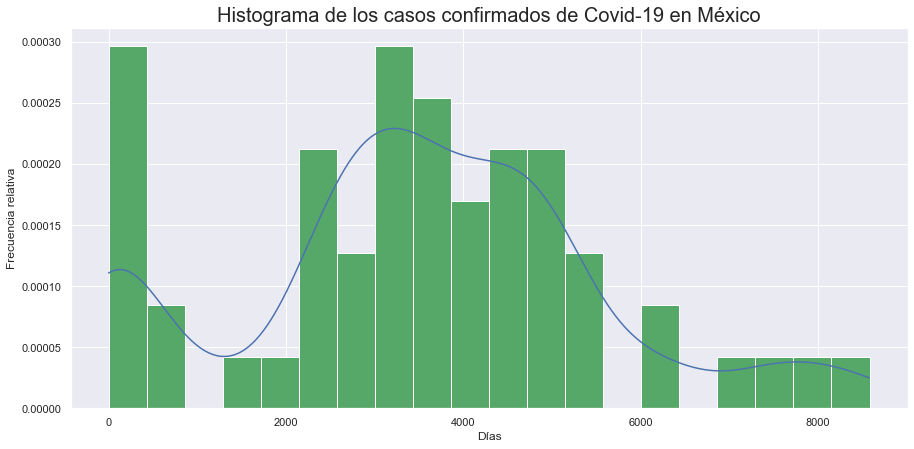

(<function __main__.hist_vs_sklearn.<locals>.<lambda>(datos)>,
 array([   0,    1,    2, ..., 8576, 8577, 8578], dtype=int64))

In [24]:
# Se grafica el histograma de los datos junto con la función de densidad obtenida
hist3 = hist_vs_sklearn(bandwidth_opt3[0], x3, 20)
hist3

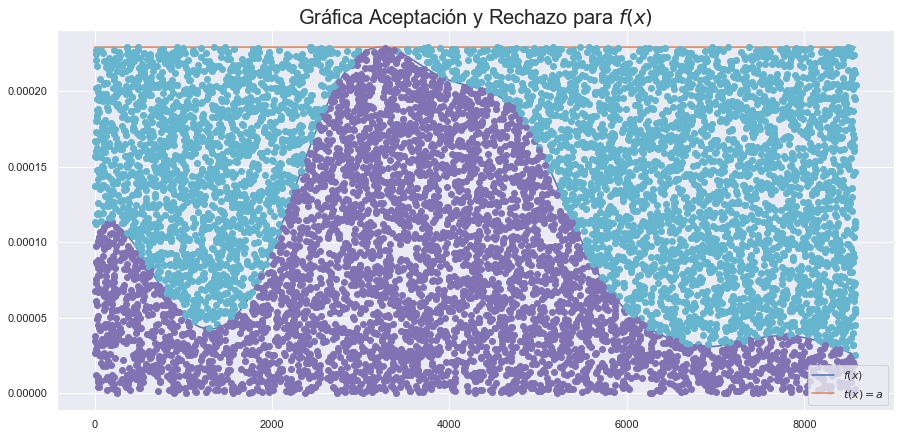

In [32]:
np.random.seed(4567)
graf3 = grafica_acep_rechazo(hist3[1] , hist3[0], 3000)
graf3

# Validación del método con reducción de varianza por números complementarios
N = 10000 # número de puntos a simular
r2_i = np.random.rand(int(N / 2)) # como estoy tomando t(x) constante solo es necesario generar valores aleatorios U ~ (0, 1)
r2_c = 1 - r2_i
R2 = np.concatenate([r2_i, r2_c])
R1 = np.random.uniform(x3.min(), x3.max(), size = N)
V_A3 = Acep_rechazo(R2, R1, graf3[0] , graf3[1])

In [33]:
# Prueba chi-cuadrada
chi2_3 = prueba_chi2(x3, best3, V_A3)
chi2_3

 Resultado de Chi2 con KDEMultivariate: Power_divergenceResult(statistic=9.413800840085393e-05, pvalue=0.9999999999954265)

 Resultado de Chi2 para la distribución gennorm: Power_divergenceResult(statistic=0.0006448100306077756, pvalue=0.9999999994385278)

 Resultado de Chi2 para la distribución genlogistic: Power_divergenceResult(statistic=0.0013708399500729973, pvalue=0.9999999963008405)

 Resultado de Chi2 para la distribución logistic: Power_divergenceResult(statistic=0.0005349116709445137, pvalue=0.9999999996480581)


In [36]:
# Prueba de Kolmogorov
prueba_kolmogorov(x3, best3, V_A3)

 Resultado de Kolmogorv-Smirnov con KDEMultivariate: KstestResult(statistic=0.14545454545454545, pvalue=0.6102226105623011)

 Resultado de Kolmogorov-Smirnov para la distribución gennorm: KstestResult(statistic=0.07782752154640508, pvalue=0.8672115510758689)

 Resultado de Kolmogorov-Smirnov para la distribución genlogistic: KstestResult(statistic=0.07831319655571287, pvalue=0.8624309353146069)

 Resultado de Kolmogorov-Smirnov para la distribución logistic: KstestResult(statistic=0.07883948656541569, pvalue=0.8571697334933468)


In [34]:
# Comparación de histogramas
histreal_vs_histva(x3, va = V_A3);

NameError: name 'histreal_vs_histva' is not defined

##### Variable: Sospechosos

#### <font color = "blue"> Nodo 3:  50% de la población se moviliza durante 4 semanas (cuarentena flexible) <font color>

##### Variable: Confirmados

In [34]:
# Se hace una función que simula 4 semanas tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
r2 = 0.5
confirmados_esperados2 = np.array(list(map(lambda x: mes(sem, r2, limite1, x1, V_A1), range(escenarios)))).astype("int")

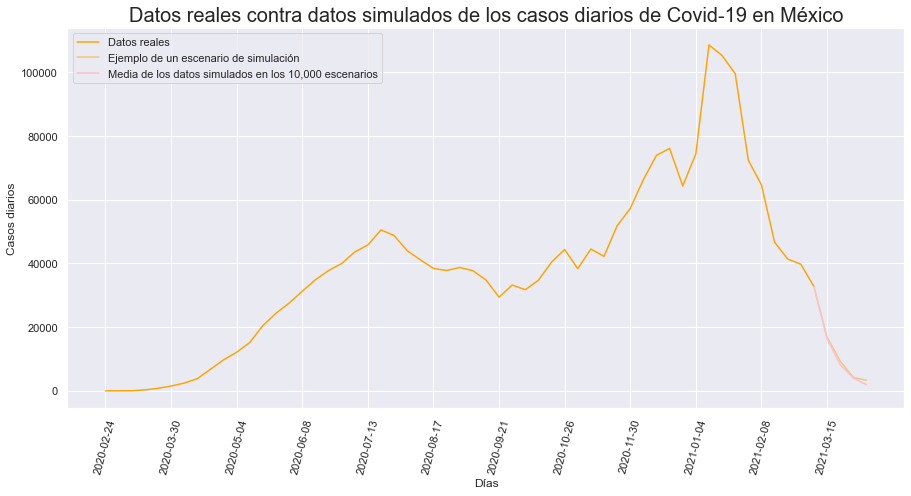

,0
2021-03-08,32742.0000
2021-03-15,16421.2993
2021-03-22,8207.4561
2021-03-29,4020.4161
2021-04-05,1939.7756


In [35]:
# Graficar el forecast
sim2 = grafica_forecast(confirmados_esperados2, data_confirmados, 1234)
sim2

In [36]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim2.iloc[-1][0], data_confirmados["Confirmados"])

1

##### Variable: Hospitalizados

In [37]:
# Se hace una función que simula 4 semanas tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
hospitalizados_esperados2 = np.array(list(map(lambda x: mes(sem, r2, limite2, x2, V_A2), range(escenarios)))).astype("int")

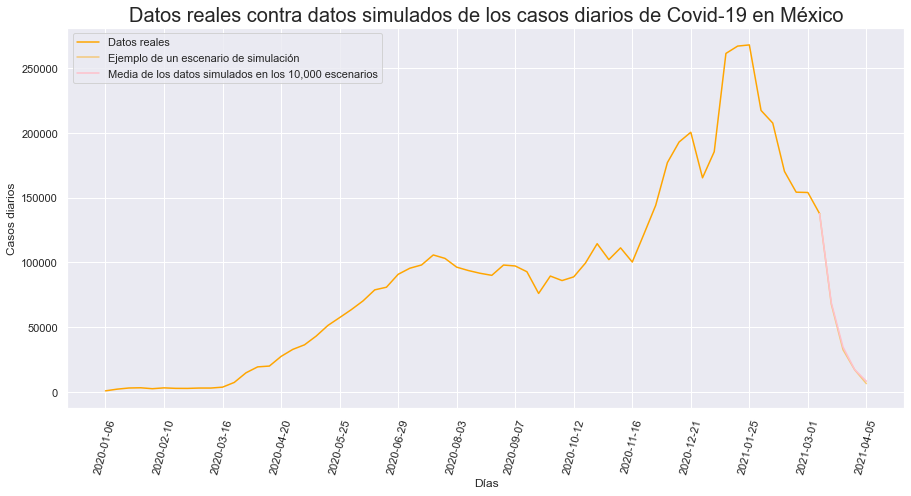

,0
2021-03-08,137726.0000
2021-03-15,68940.4567
2021-03-22,34839.0844
2021-03-29,17301.3115
2021-04-05,8347.3078


In [38]:
# Graficar el forecast
sim6 = grafica_forecast(hospitalizados_esperados2, data_hospitalizados, 1234)
sim6

In [39]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim6.iloc[-1][0], data_hospitalizados["Hospitalizados"])

1

##### Variable: Defunciones

#### Varible: Sospechosos

#### <font color = "blue"> Nodo 2:  25% de la población se moviliza durante 4 semanas (cuarentena moderada) <font color>

##### Variable: Confirmados

In [40]:
# Se hace una función que simula 4 semanas tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
r3 = 0.25
confirmados_esperados3 = np.array(list(map(lambda x: mes(sem, r3, limite1, x1, V_A1), range(escenarios)))).astype("int")

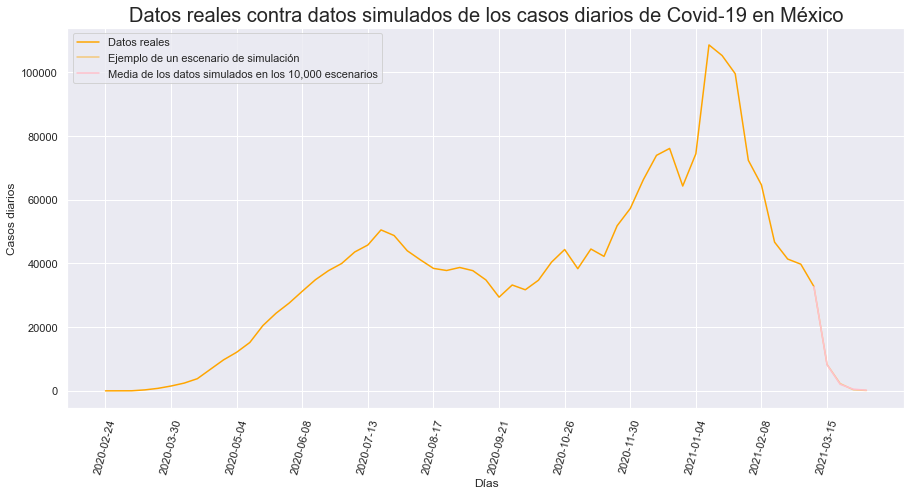

,0
2021-03-08,32742.0000
2021-03-15,8209.8380
2021-03-22,2051.5691
2021-03-29,524.9270
2021-04-05,223.4090


In [41]:
# Graficar el forecast
sim3 = grafica_forecast(confirmados_esperados3, data_confirmados, 1234)
sim3

In [42]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim3.iloc[-1][0], data_confirmados["Confirmados"])

1

##### Variable: Hospitalizados

In [43]:
# Se hace una función que simula 4 semanas tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
hospitalizados_esperados3 = np.array(list(map(lambda x: mes(sem, r3, limite2, x2, V_A2), range(escenarios)))).astype("int")

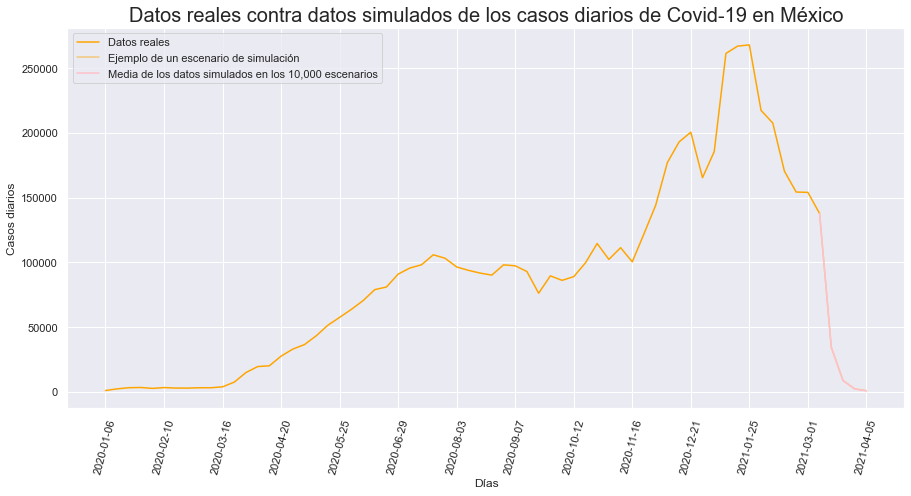

,0
2021-03-08,137726.0000
2021-03-15,34495.6769
2021-03-22,8649.5360
2021-03-29,2076.3081
2021-04-05,685.9259


In [44]:
# Graficar el forecast
sim7 = grafica_forecast(hospitalizados_esperados3, data_hospitalizados, 1234)
sim7

In [49]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim7.iloc[-1][0], data_hospitalizados["Hospitalizados"])

1

##### Variable: Defunciones

##### Variable: Sospechosos

#### <font color = "blue">  Nodo 1:  10% de la población se moviliza durante 4 semanas (cuarentena estricta) <font color>

##### Variable: Confirmados

In [50]:
# Se hace una función que simula 4 semanas tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
r4 = 0.1
confirmados_esperados4 = np.array(list(map(lambda x: mes(sem, r4, limite1, x1, V_A1), range(escenarios)))).astype("int")

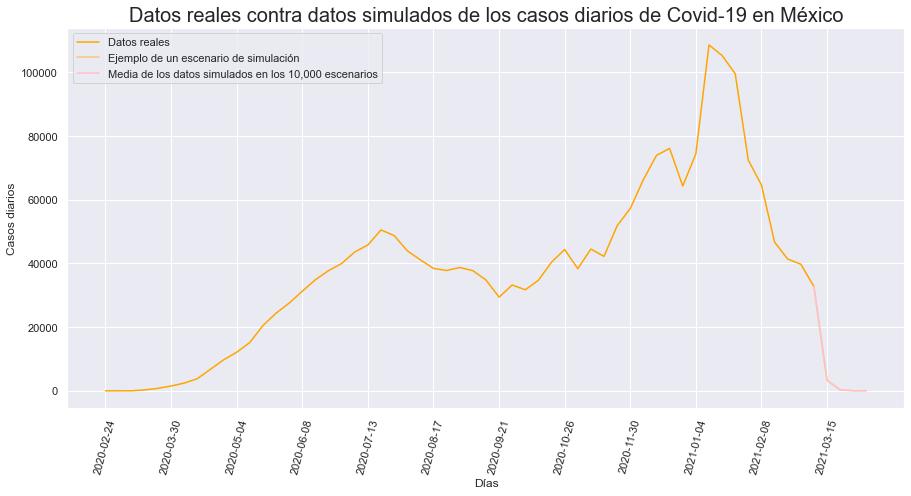

,0
2021-03-08,32742.0000
2021-03-15,3275.9676
2021-03-22,314.2253
2021-03-29,40.6061
2021-04-05,31.1675


In [51]:
# Graficar el forecast
sim4 = grafica_forecast(confirmados_esperados4, data_confirmados, 1234)
sim4

In [52]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim4.iloc[-1][0], data_confirmados["Confirmados"])

1

##### Variable: Hospitalizados

In [53]:
np.random.seed(4567)
hospitalizados_esperados4 = np.array(list(map(lambda x: mes(sem, r4, limite2, x2, V_A2), range(escenarios)))).astype("int")

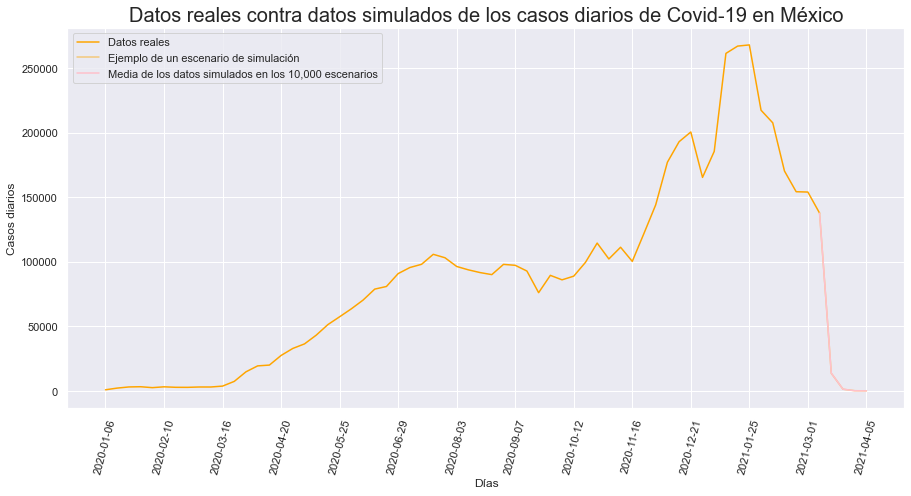

,0
2021-03-08,137726.0000
2021-03-15,13780.3180
2021-03-22,1387.8425
2021-03-29,171.8433
2021-04-05,104.8586


In [54]:
# Graficar el forecast
sim8 = grafica_forecast(hospitalizados_esperados4, data_hospitalizados, 1234)
sim8

In [55]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim8.iloc[-1][0], data_hospitalizados["Hospitalizados"])

1

##### Variable: Defunciones

##### Variable: Sospechosos

### 1.7 Referencias.
1. Consejo Nacional de Ciencia y Tecnología (2021). *Covid-19 México*. Recuperado 13 marzo 2021, de https://datos.covid-19.conacyt.mx/#DownZCSV
2. Instituto Mexicano del Seguro Social (s. f.). *Definiciones opercaciones de casos Covid-19*. Recuperado de http://educacionensalud.imss.gob.mx/es/system/files/Definiciones_operacionales_de_casos_COVID-19.pdf
3. World Health Organization. (2021). *WHO Coronavirus Disease (Covid-19) Dashboard*. Recuperado 7 marzo 2021 de https://covid19.who.int/

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>